# 正则化（Regularization）


L1正则化：权值向量w中各个元素的绝对值之和
$$\sum_w |w|$$
L2正则化：权值向量w中各个元素的平方和
$$\sum_w w^2$$

L1正则化和L2正则化可以看做是损失函数的惩罚项。所谓【惩罚】是指对损失函数中的某些参数做一些限制。
<br>
正则化会使待估参数的偏差变大、方差变小，从而防止过拟合，提高模型泛化能力。

### 正则化和线性回归
对于线性回归模型，使用L1正则化的模型叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）。

对于待估参数为 $w$ ， $h_w(x)$ 是我们的假设函数：
$$h_w(x) = w_0 + w_1 x_1 + w_2 x_2 ... + w_n x_n$$

假设有 $m$ 个样本，线性回归的代价函数如下：
$$J(w) = \frac{1}{2m} \sum _{i=0}^m (h_w(x_i) - y_i)^2$$

在梯度下降算法中，需要先对参数求导，得到梯度。下面是某个参数 $w_j$ 的偏导：
$$  \frac{\partial}{\partial w_j} J(w) = \frac{1}{m} \sum _{i=0}^m (h_w(x_i) - y_i) x_{ij} $$

梯度下降算法中，使用负号来沿梯度的负方向更新参数，并乘以学习率 $\alpha$ ，得到 $w_j$ 最终迭代公式：
$$ w_j :=  w_j - \alpha \frac{1}{m} \sum _{i=0}^m (h_w(x_i) - y_i) x_{ij} $$

在原代价函数后添加L1正则化（ $\lambda$ 是正则化参数）：
$$J(w) = \frac{1}{2m} \sum _{i=0}^m (h_w(x_i) - y_i)^2 + \lambda |w_j| $$
迭代公式会变成：
$$ w_j := w_j - \alpha ( \frac{1}{m} \sum _{i=0}^m (h_w(x_i) - y_i) x_{ij} + \lambda \frac{|w_j|}{w_j}  ) $$

在原代价函数后添加L2正则化（ $\lambda$ 是正则化参数）：
$$J(w) = \frac{1}{2m} \sum _{i=0}^m (h_w(x_i) - y_i)^2 + \frac{\lambda}{2} w_j^2 $$
迭代公式会变成：
$$ w_j := w_j - \alpha ( \frac{1}{m} \sum _{i=0}^m (h_w(x_i) - y_i) x_{ij} + \lambda w_j ) $$

添加正则化惩罚项后，修改了 $w_j$ 每次迭代变化的大小。

![](https://img-blog.csdnimg.cn/20190612200756669.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_30,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1llbGxvd19weXRob24=,size_16,color_FFFFFF,t_70)

- 如图示，假设 $w$ 有两参数 $w_1,w_2$
- 椭圆为最小二乘误差函数的等高线。
- lasso的约束区域：$|w_1|+|w_2|$
- 岭回归的约束区域：$w_1^2+w_2^2$
- 等高线和约束域的切点就是目标函数的最优解
- lasso的等高线和约束域的切点倾向于出现在近坐标轴的位置，故容易产生稀疏的结果；而Ridge的切点一般距离坐标轴较远。

### example
波士顿房价数据集

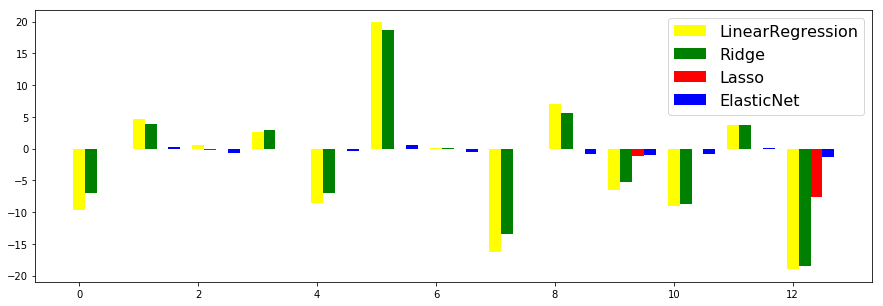

In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np, matplotlib.pyplot as mp

bunch = load_boston()
X = bunch.data
Y = bunch.target
X = MinMaxScaler().fit_transform(X)

arange = np.arange(X.shape[1])
width = .2  # 条形图宽度
ls = [
    (LinearRegression(), 'yellow', 0, 'LinearRegression'),
    (Ridge(), 'green', 1, 'Ridge'),
    (Lasso(), 'red', 2, 'Lasso'),
    (ElasticNet(), 'blue', 3, 'ElasticNet')
]
mp.figure(figsize=(15, 5))
for model, color, offset, label in ls:
    model.fit(X, Y)  # 拟合
    mp.bar(arange + width * offset, model.coef_, width=width, color=color, label=label)
mp.legend(prop={'size': 16})
mp.show()

### L2正则化和过拟合
拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是【抗扰动能力强】。

In [2]:
%matplotlib inline
import matplotlib.pyplot as mp, numpy as np
from sklearn.datasets import make_blobs

手写一个神经网络

In [3]:
class NN:
    def __init__(self, nn=16, lr=1., precision=1e-7, alpha=0.):
        self.nn = nn  # 神经元个数
        self.lr = lr  # 学习率
        self.precision = precision  # 允许误差范围
        self.alpha = alpha  # l2正则化惩罚项系数
        self.loss = [9e99]  # 记录损失值
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None

    def fit(self, X, y):
        n = X.shape[0]  # 样本数
        d = X.shape[1]  # 维数
        k = len(np.unique(y))  # 种类数
        # 参数初始化
        W1 = 0.01 * np.random.randn(d, self.nn)
        b1 = np.zeros((1, self.nn))
        W2 = 0.01 * np.random.randn(self.nn, k)
        b2 = np.zeros((1, k))
        # 梯度下降循环
        for i in range(10000):
            # ReLU激活
            hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
            # 得分
            scores = np.dot(hidden_layer, W2) + b2
            # 概率
            exp_scores = np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # 记录损失值
            l2 = self.alpha * .5 * (np.sum(np.dot(W1, W1.T)) + np.sum(np.dot(W2, W2.T)))
            loss = np.mean(-np.log(probs[range(n), y])) + l2
            if np.abs(loss - self.loss[-1]) < self.precision:
                break  # 损失值变化足够小时退出迭代
            self.loss.append(loss)
            # 梯度
            probs[range(n), y] -= 1
            dscores = probs / n
            # 反向传播
            dhidden = np.dot(dscores, W2.T)  # 隐层
            dhidden[hidden_layer <= 0] = 0  # ReLU
            # 参数更新：W2、b2
            W2 -= self.lr * np.dot(hidden_layer.T, dscores) + self.alpha * W2
            b2 -= self.lr * np.sum(dscores, axis=0, keepdims=True)
            # 参数更新：W1、b1
            W1 -= self.lr * np.dot(X.T, dhidden) + self.alpha * W1
            b1 -= self.lr * np.sum(dhidden, axis=0, keepdims=True)
        # 训练完成
        self.W1, self.b1 = W1, b1
        self.W2, self.b2 = W2, b2
        self.loss = self.loss[1:]

多图可视化函数

In [4]:
def visualize(X, y, nn, i, le):
    mp.subplot(1, le, i)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], nn.W1) + nn.b1), nn.W2) + nn.b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    mp.contourf(xx, yy, Z, alpha=.1)
    mp.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=.7)
    mp.axis('off')

探究L2正则化系数对拟合效果的影响

迭代次数：9567 最终损失值：0.0250
迭代次数：10000 最终损失值：0.1257
迭代次数：4076 最终损失值：0.2560
迭代次数：10000 最终损失值：0.7355


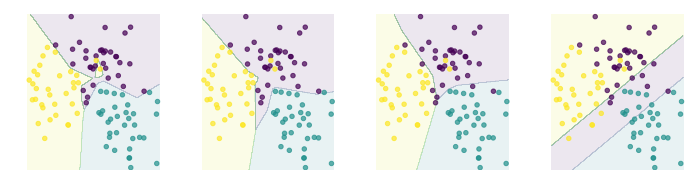

In [6]:
X, y = make_blobs(random_state=0)  # 创建随机样本
mp.figure(figsize=(12, 3))
ls = [0., 1e-3, 1e-2, 1e-1]  # L2正则化系数
le = len(ls)
for i in range(le):
    nn = NN(alpha=ls[i])  # 建模
    nn.fit(X, y)  # 拟合
    print('迭代次数：%5d' % len(nn.loss), '最终损失值：%.4f' % nn.loss[-1])
    visualize(X, y, nn, i + 1, le)  # 可视化
mp.show()

In [29]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np, matplotlib.pyplot as mp
from mpl_toolkits import mplot3d  # 绘制3d图
%matplotlib inline

"""超参数"""
lr = 5e-3  # 学习率
alpha = 2e1  # 正则化系数

"""数据加载"""
X, Y = make_regression(n_features=2, noise=9, random_state=0)
X = StandardScaler().fit_transform(X)  # 数据标准化
X1, X2 = X[:, 0], X[:, 1]

"""损失函数"""
def loss(w0, w1, w2, penalty=''):
    if penalty == 'l1':
        penalty = alpha * np.sum(np.abs([w0, w1, w2]))
    elif penalty == 'l2':
        penalty = alpha * np.sum(np.square([w0, w1, w2]))
    else:
        penalty = 0
    return np.mean([((w0 + w1 * x1 + w2 * x2) - y) ** 2 for (x1, x2), y in zip(X, Y)]) + penalty

"""梯度下降"""
def gradient_descent(w0, w1, w2, penalty=''):
    if penalty == 'l1':
        penalty = lambda wi: alpha * (1 if wi > 0 else -1 if wi < 0 else 0)
    elif penalty == 'l2':
        penalty = lambda wi: alpha * wi
    else:
        penalty = lambda wi: 0
    dw0, dw1, dw2 = 0., 0., 0.
    for (x1, x2), y in zip(X, Y):
        dw0 += ((w0 + w1 * x1 + w2 * x2) - y) * 1
        dw1 += ((w0 + w1 * x1 + w2 * x2) - y) * x1
        dw2 += ((w0 + w1 * x1 + w2 * x2) - y) * x2
    dw0 += penalty(w0)
    dw1 += penalty(w1)
    dw2 += penalty(w2)
    w0 -= lr * dw0
    w1 -= lr * dw1
    w2 -= lr * dw2
    return w0, w1, w2

def update(p):
    """系数更新"""
    w0, w1, w2 = .0, .0, 0.  # 系数初始化
    for i in range(10):
        w0, w1, w2 = gradient_descent(w0, w1, w2, p)  # 参数更新
        print('step%d' % i, '|', w0, w1, w2, '|', loss(w0, w1, w2, p))
    """可视化"""
    ax = mplot3d.Axes3D(mp.figure())  # 获取三维坐标轴
    ax.scatter(X1, X2, Y, s=150)  # 散点图
    x = np.array([[X1.min(), X2.min()], [X1.min(), X2.max()], [X1.max(), X2.min()]])
    x1, x2 = np.meshgrid(x[:, 0], x[:, 1])  # 网格
    y = w0 + w1 * x1 + w2 * x2  # 边界函数
    ax.plot_surface(x1, x2, y, alpha=0.1, color='green')  # 拟合平面
    mp.show()

step0 | 1.7730151171531052 13.39926450428863 49.310661893910854 | 2787.5962540061482
step1 | 2.6595226757296575 20.690752943717793 74.12681886301525 | 769.5288908933729
step2 | 3.102776455017935 24.634355587608393 86.62241417215756 | 251.49791688208094
step3 | 3.3244033446620715 26.756136551145907 92.9175453147683 | 118.31740012395976
step4 | 3.43521678948414 27.89258497866967 96.09057777585167 | 84.02848625767955
step5 | 3.490623511895175 28.49889383421933 97.69073434313853 | 75.18836296904469
step6 | 3.5183268731006923 28.82125430240406 98.49808990990452 | 72.90634752810512
step7 | 3.5321785537034516 28.992124903025218 98.90563685728377 | 72.31655475307247
step8 | 3.53910439400483 29.082451826630862 99.11146122257205 | 72.1639503993282
step9 | 3.5425673141555203 29.13008571611425 99.21545756321693 | 72.12442391345249


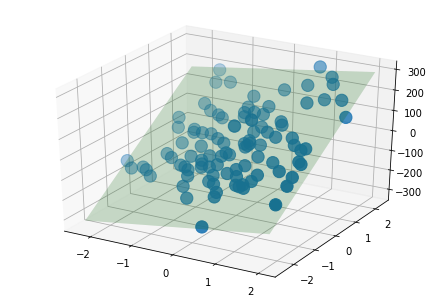

In [30]:
update('')

step0 | 1.7730151171531052 13.39926450428863 49.310661893910854 | 4077.2550843132003
step1 | 2.5595226757296574 20.590752943717796 74.02681886301524 | 2719.8532811315254
step2 | 2.9527764550179336 24.48315532753369 86.47121391208285 | 2534.931489553029
step3 | 3.1494033446620717 26.578721624754028 92.74013038837641 | 2570.9104075638184
step4 | 3.2477167894841403 27.701748074945684 95.8997408721277 | 2622.8447013685495
step5 | 3.2968735118951757 28.30118484319414 97.49302535211334 | 2658.0387673692494
step6 | 3.3214518731006923 28.62002678480809 98.29686239230854 | 2678.2674515715917
step7 | 3.3337410537034513 28.789095890674208 98.70260784493274 | 2689.1912971146485
step8 | 3.33988564400483 28.878500444280043 98.90750984022122 | 2694.929212658476
step9 | 3.3429579391555193 28.92566207792468 99.01103392502736 | 2697.9037826362937


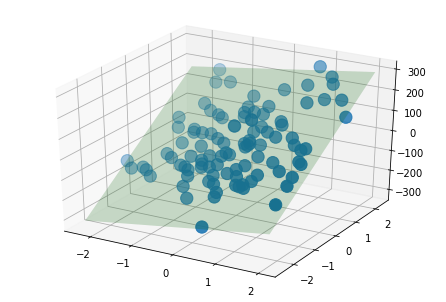

In [31]:
update('l1')

step0 | 1.7730151171531052 13.39926450428863 49.310661893910854 | 55072.101219548844
step1 | 2.482221164014347 19.35082649328893 69.19575267362416 | 104436.63318328004
step2 | 2.7659035827588436 21.970124094336583 77.22122320788469 | 129674.60441160022
step3 | 2.8793765502566413 23.1141696533855 80.46284980493196 | 140796.06751886377
step4 | 2.9247657372557607 23.61069582682041 81.77323196583255 | 145464.41798298515
step5 | 2.942921412055409 23.825034290097708 82.30334443561298 | 147389.10299117528
step6 | 2.9501836819752687 23.917132403734428 82.51796204252462 | 148177.25281526873
step7 | 2.9530885899432127 23.95654761863816 82.6049145021768 | 148499.21352125268
step8 | 2.9542505531303895 23.973357360256834 82.64016857112553 | 148630.643894482
step9 | 2.95471533840526 23.980504397418603 82.65447195932232 | 148684.29618038738


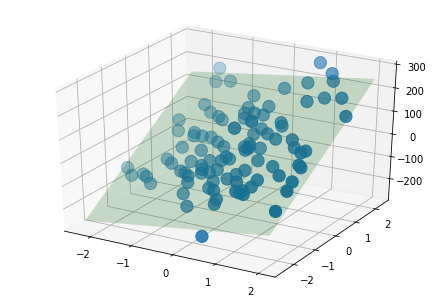

In [32]:
update('l2')